In [1]:
using Revise
include("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [2]:
n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 10^5 # number of training iterations
layer_dims = (xdim, h1, h2, h3, ydim) # tuple of layer dims

(12, 24, 24, 24, 1)

In [3]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)


(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [4]:
xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 1 0 … 0 1], [1 1 … 1 0], [1 1 … 0 1; 0 1 … 0 0; … ; 1 1 … 0 1; 1 1 … 0 1], [1 1 … 0 0])

In [5]:
includet("../codebase/rewiring.jl")
using .rewiring

In [6]:
w, b, losstrn, losstst = mlp.backprop(w, b, niter, n, ntest, nbatch, layer_dims);

┣████████████████████┫ [100.00%, 100000/100000, 01:40/01:40, 1000.38i/s] 


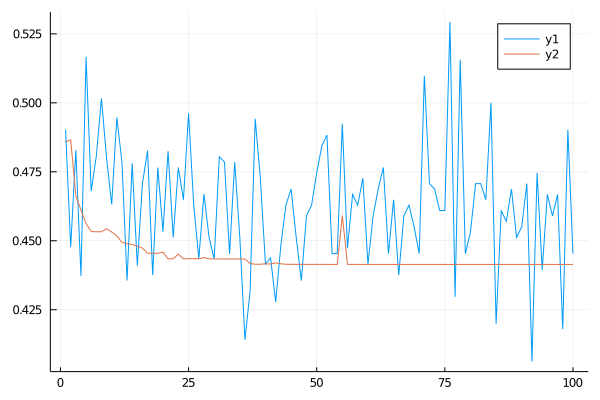

In [7]:
plot(losstrn)
plot!(losstst) 

In [8]:
includet("../codebase/rewiring.jl")
using .rewiring

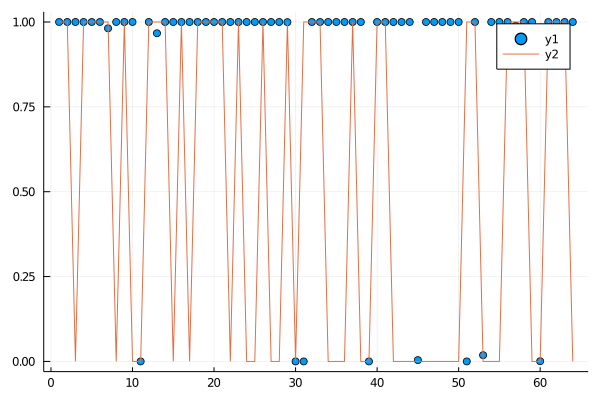

In [9]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [10]:
# accuracy
function acc(w,b,x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

acc (generic function with 1 method)

In [11]:
acc(w,b,xtrn,ytrn),acc(w,b,xtst,ytst)

(0.543120290259559, 0.56640625)

In [12]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)
    sumtrn += acc(w,b,xtrn,ytrn); sumtst += acc(w,b,xtst,ytst)
end

(sumtrn/100,sumtst/100)

(0.5459614847892831, 0.54525390625)

In [13]:
A = rewiring.computeKernel(w,layer_dims)
println(sum(A))
w = computeKernel_reverse(w, A, layer_dims)
sum(sum.(w)), sum(A)

NaN


(-29.07339560158592, NaN)

In [14]:
A = rewiring.computeKernel(w,layer_dims)
println(sum(A))
A, xCutTail, nodeX = pruneInDegrees(A, 0.5, 0)
w = computeKernel_reverse(w, A, layer_dims)
sum(sum.(w)), sum(A)

-29.07339560158591


(-31.03745157120226, -31.037451571202258)

In [15]:
w, b, losstrn, losstst = mlp.backprop(w, b, niter, n, ntest, nbatch, layer_dims, rewire = false, LR = 0.1, pRandPrune = 0.5)

┣████████████████████┫ [100.00%, 100000/100000, 02:00/02:00, 832.23i/s] 


((P(Array{Float64,2}(24,12)), P(Array{Float64,2}(24,24)), P(Array{Float64,2}(24,24)), P(Array{Float64,2}(1,24))), (P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1))), Any[0.4684292784091898, 0.484375, 0.517578125, 0.49218633171542986, 0.482418291707046, 0.25040486512105226, 0.25056891299648804, 0.2500290687793358, 0.25161878874219124, 0.2517981692896356  …  0.25022664697593233, 0.25011485718117205, 0.2508978670074323, 0.2497749268219792, 0.25045503427955845, 0.25017203444733477, 0.24947774728925523, 0.24998732246615327, 0.25023030481527486, 0.25042398435781016], Any[0.4902320378544081, 0.544921875, 0.544921875, 0.544920581546327, 0.5449178279886359, 0.2503946575093145, 0.24887255769851066, 0.25006591936606803, 0.24841442885155424, 0.25633835974027686  …  0.2511820706920328, 0.24964342319689312, 0.2517223801761273, 0.250585833425915, 0.24939469075862206, 0.2511437888303509, 0.25197084405868925, 0.2500778711311289, 0.25104345287040625, 0.24

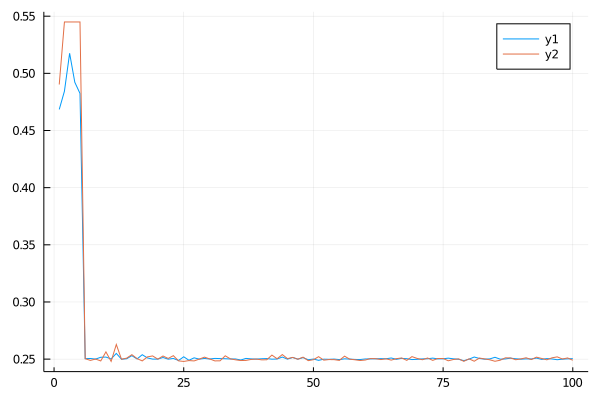

In [16]:
plot(losstrn)
plot!(losstst) 

In [17]:
acc(w,b,xtrn,ytrn),acc(w,b,xtst,ytst)

(0.9997209042701647, 0.998046875)

In [18]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)
    sumtrn += acc(w,b,xtrn,ytrn); sumtst += acc(w,b,xtst,ytst)
end

(sumtrn/100,sumtst/100)

(0.9997209042701636, 0.998046875)